In [14]:
#Gonna figure out how to let the argument of thermal functions take imaginary values (s.t. x**2 becomes negative)
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate 
import cmath 

from cmath import *

In [56]:
def Jb(x):
    
    integrand = lambda k: (k**2)*np.log(1 - np.exp(-np.sqrt(k**2 + x**2)))
            
    if x.imag == 0:
        x = np.abs(x)
        return integrate.quad(integrand, 0, np.inf)[0]   
    
    else:
        
        integrand1 = lambda k: k**2*np.log(2*np.abs(np.sin(np.sqrt(np.abs(x**2) - k**2 )/2)))
        
        y = np.linspace(0, np.abs(x), 1000)
        return ( integrate.quad(integrand1, 0, np.abs(x))[0] +
                 integrate.quad(integrand, np.abs(x), np.inf)[0] ) 

    
    
## this is the real part of the integrand if m-squared would take on negative values so that for certain k, the 
## exponential becomes imaginary, as is the case for certain phi values of the higgs mass m_h(phi) and goldstone masses.

def integrand(k, x):
    return k**2*np.log(2*(1 - np.cos(np.sqrt(-k**2 + x**2))))

In [101]:
# Parameters and effective masses to be used in the effective potential
# constants of higgs tree level potential
mu = 1000
lam = 0.01
c6 = -1/1000000
Lam = 246
eps = 0.0000001


def m_h(phi):                                               
    return cmath.sqrt(3*lam*phi**2 - mu**2 - (15/4)*c6*phi**4) + eps



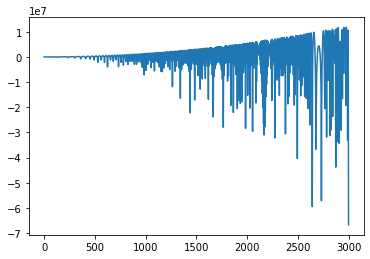

In [80]:
x = 3000
k = np.linspace(0, x- eps, 1000)
integ = np.vectorize(integrand)
Int = integ(k,x)

plt.plot(k, Int)

3749.4000000001


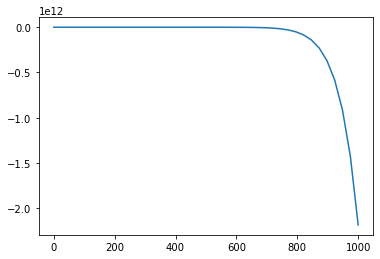

In [108]:
# High T expansion of thermal function since integrals seems very cumbersome won't work

gamma = 0.577215661901532


def Jb_high(y):
    
    return y**2/24 - y**3/12*np.pi - y**4/(2*(4*np.pi**4))*(cmath.log((y*np.exp(gamma)/4*np.pi) - 3/4))
    
def Jf_high(m,T):
    
    return -(m**2)*(T**2)/48 - m**4/2*((4*np.pi)**2)*(np.log(m*np.exp(gamma)/np.pi*T) - 1/2)

T = 100000

phi = np.linspace(0,1000,40)
mh = np.vectorize(m_h)(phi)
print(np.max(np.abs(mh/T)))

jb = np.vectorize(Jb_high)(mh/T)

plt.plot(phi, jb.real)


In [140]:
# Parameters and effective masses to be used in the effective potential
# constants of higgs tree level potential
mu = 3000
lam = 0.01
c6 = -1/10000
Lam = 246

#yukawa coupling constant of fermion f 
y_f = 0.99                                          #(for the top quark)

#EW - sector coupling constants g (SU(2)_L) and g_p (U(1)_Y) 
g = 0.65
g_p = 0.36
eps = 0.00001


# Effective mass of fermion f acquired through yukawa coupling w/ the Higgs
def m_f(phi):
    return y_f**2/2*phi**2 + eps

# W and Z boson masses
def m_W(phi):
    return (g**2/4)*phi**2 + eps

def m_Z(phi):
    return (g**2 + g_p**2)*phi**2/4 + eps

# Higgs and Goldstone masses
def m_h(phi):                                               
    return 3*lam*phi**2 - mu**2 - (15/4)*c6*phi**4 + eps

#m_h 0 at h_min = (2/5)*(lam/c6)*(1 - np.sqrt(1-5/3*c6*(mu**2)/lam**2))

def m_g(phi):
    return lam*phi**2 - mu**2 - (3/4)*c6*phi**4 + eps


C:\Users\alana\AppData\Local\Temp/ipykernel_9236/4170379552.py:9: RuntimeWarning: overflow encountered in long_scalars
  + 6*m_W(phi)**2/(64*np.pi**2)*(cmath.log(m_W(phi)/Lam) - 5/6) + (T**4)*6*Jb_high(cmath.sqrt(m_W(phi))/T)


-346343.5012621117


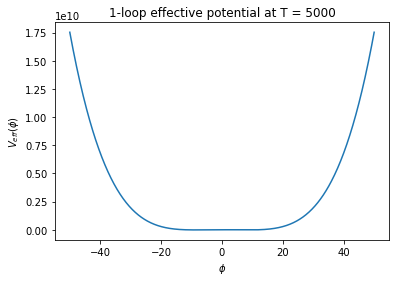

In [139]:
Lam = 246     # regulator/Cutoff(?)

#1-loop effective potential
def v_eff(phi,T):
    return np.real(-(mu**2)/2*phi**2 + (lam/4)*phi**4 - (c6/8)*phi**6
            + m_h(phi)**2/(64*np.pi**2)*(cmath.log(m_h(phi)/Lam) - 3/2) + (T**4)*Jb_high(cmath.sqrt(m_h(phi))/T)
            + 3*m_g(phi)**2/(64*np.pi**2)*(cmath.log(m_g(phi)/Lam) - 3/2) + (T**4)*3*Jb_high(cmath.sqrt(m_g(phi))/T)
            + 3*m_Z(phi)**2/(64*np.pi**2)*(cmath.log(m_Z(phi)/Lam) - 5/6) + (T**4)*3*Jb_high(cmath.sqrt(m_Z(phi))/T)
            + 6*m_W(phi)**2/(64*np.pi**2)*(cmath.log(m_W(phi)/Lam) - 5/6) + (T**4)*6*Jb_high(cmath.sqrt(m_W(phi))/T)    
            - 12*m_f(phi)**2/(64*np.pi**2)*(cmath.log(m_f(phi)/Lam) - 3/2) - 12*Jf_high(cmath.sqrt(m_f(phi)),T)
           )

vecv_eff = np.vectorize(v_eff)


phi = np.linspace(-50,50,1000)
T = 5000
arrv_eff = vecv_eff(phi,T) - v_eff(0,T)


plt.plot(phi, arrv_eff)
plt.xlabel('$\phi$')
plt.ylabel('$V_{eff}(\phi)$')
plt.title('1-loop effective potential at T = %1.0f'  % T)

#Tree level min
phi_min = ((2*lam)/(3*c6))*(1 - np.sqrt(1 - (3*c6*mu**2)/(lam**2)))
print(phi_min)